In [5]:
import sys
import os

# Add the path to `database_scripts` folder
sys.path.append(os.path.abspath("../database_scripts"))
import  db_utils as du
import create_tables as ct
gdf_bezirke = du.get_geo()

In [6]:
from shapely import Point
import geopandas as gpd
import pandas as pd

excel_file_path = '../data/raw/Fahrrad/gesamtdatei-stundenwerte.xlsx'


df_zaehlstellen = pd.read_excel(excel_file_path, sheet_name = 'Standortdaten')

df_zaehlstellen.columns = ['Zählstelle', 'Beschreibung', 'Breitengrad', 'Längengrad', 'Installationsdatum']

# Create GeoDataFrame for Zählstellen
geometry = [Point(xy) for xy in zip(df_zaehlstellen["Längengrad"], df_zaehlstellen["Breitengrad"])]
gdf_zaehlstellen = gpd.GeoDataFrame(df_zaehlstellen, geometry=geometry, crs="EPSG:4326")

# Spatial join: Match Zählstellen with Bezirke
gdf_zaehlstellen = gpd.sjoin(gdf_zaehlstellen, gdf_bezirke, how="left", predicate="within")
 

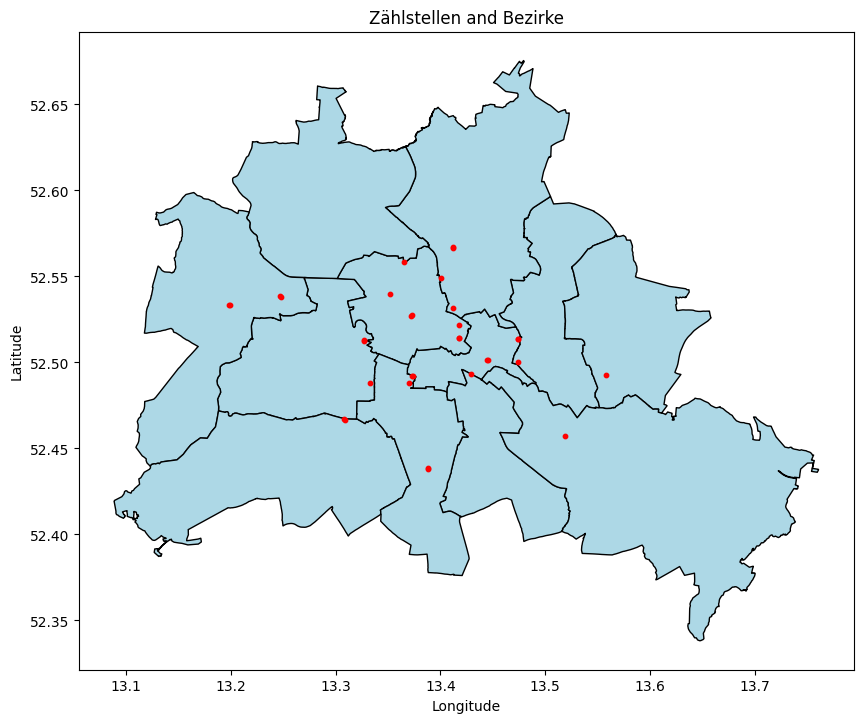

In [8]:
import matplotlib.pyplot as plt

ax = gdf_bezirke.plot(color="lightblue", edgecolor="black", figsize=(10, 10))
gdf_zaehlstellen.plot(ax=ax, color="red", markersize=10)
plt.title("Zählstellen and Bezirke")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [11]:
print(gdf_bezirke.columns)

Index(['geometry', 'element', 'id', 'Breitengrad', 'Längengrad'], dtype='object')


In [12]:

import folium
from shapely.geometry import mapping

# Create a folium map centered on Berlin
m = folium.Map(location=[52.5200, 13.4050], zoom_start=11)

# Add Bezirke polygons
for _, row in gdf_bezirke.iterrows():
    folium.GeoJson(
        mapping(row['geometry']),
        name=row['element'],
        tooltip=folium.Tooltip(f"Bezirk: {row['element']}"),
    ).add_to(m)

# Add Zählstellen points
for _, row in gdf_zaehlstellen.iterrows():
    folium.Marker(
        location=[row['Breitengrad'], row['Längengrad']],
        tooltip=f"Zählstelle: {row['Zählstelle']}\nBeschreibung: {row['Beschreibung']}"
    ).add_to(m)

# Save to an HTML file or display in Jupyter Notebook
m.save("berlin_interactive_map.html")
m


KeyError: 'Breitengrad'